# Support Vector Machines
## Dataset: Iris Dataset

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for better performance of SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [2]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Example usage
if __name__ == "__main__":
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Load data
    X, y = datasets.load_iris(return_X_y=True)
    X = X[y != 2]  # binary classification for simplicity
    y = y[y != 2]  # binary classification for simplicity
    y[y == 0] = -1  # SVM expects classes in {-1, 1}

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train SVM
    svm = LinearSVM()
    svm.fit(X_train, y_train)

    # Predict and evaluate
    predictions = svm.predict(X_test)
    print("SVM accuracy:", accuracy_score(y_test, predictions))


SVM accuracy: 1.0


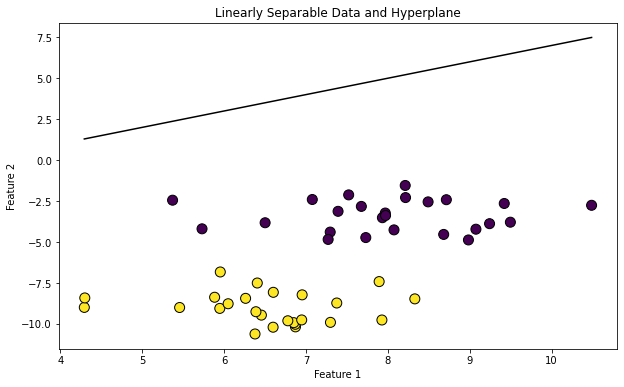

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate linearly separable data
X, y = make_blobs(n_samples=50, centers=2, random_state=6, n_features=2)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k')

# Create a dummy hyperplane (for illustration)
x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

w = np.array([1, -1])  # This is a dummy weight vector
b = -3  # This is a dummy bias term
x1_1 = (-w[0] * x0_1 - b) / w[1]
x1_2 = (-w[0] * x0_2 - b) / w[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k-')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data and Hyperplane')
plt.show()


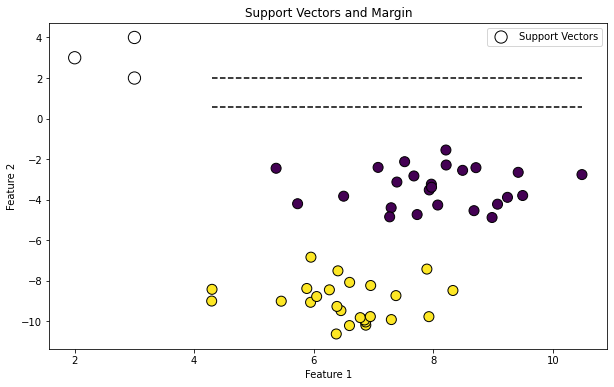

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k')

# Dummy support vectors for illustration
sv = np.array([[2, 3], [3, 4], [3, 2]])  # These are dummy support vector points
plt.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k', label='Support Vectors')

# Margin lines (parallel to hyperplane)
margin = 1 / np.sqrt(np.sum(w**2))
x1_margin_1 = x1_1 + w[0] * margin
x1_margin_2 = x1_1 - w[0] * margin

plt.plot([x0_1, x0_2], [x1_margin_1, x1_margin_1], 'k--')
plt.plot([x0_1, x0_2], [x1_margin_2, x1_margin_2], 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vectors and Margin')
plt.legend()
plt.show()


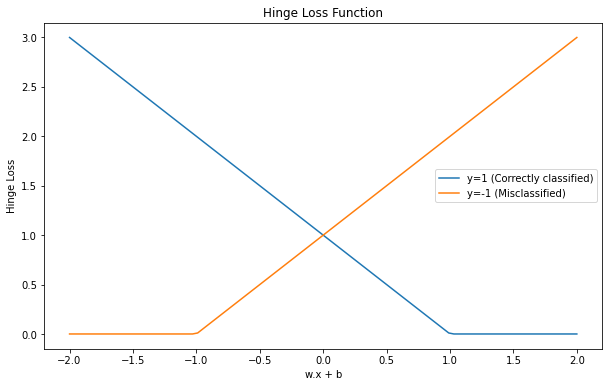

In [5]:
# Hinge Loss Plot
def hinge_loss(y, x, w=1, b=0):
    return np.maximum(0, 1 - y * (w * x + b))

x = np.linspace(-2, 2, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, hinge_loss(1, x), label='y=1 (Correctly classified)')
plt.plot(x, hinge_loss(-1, x), label='y=-1 (Misclassified)')

plt.xlabel('w.x + b')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss Function')
plt.legend()
plt.show()
